In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add an additional channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Defining the model (we haven't studied convolutional networks yet, but as suggested by open sources,
# achieving the values of a "naively simple but adequate neural network" with accuracy values close to 91%
# using only Dense layers is almost impossible. Therefore...)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Defining early stopping conditions
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Output accuracy and loss values, which the model picked after early stopping
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/20


I0000 00:00:1726483541.788501     102 service.cc:145] XLA service 0x7f1758004850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726483541.788549     102 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 61/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3668 - loss: 1.8436

I0000 00:00:1726483545.485931     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6918 - loss: 0.8590 - val_accuracy: 0.8545 - val_loss: 0.3990
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8577 - loss: 0.3979 - val_accuracy: 0.8794 - val_loss: 0.3207
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8803 - loss: 0.3345 - val_accuracy: 0.8895 - val_loss: 0.2994
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8930 - loss: 0.2930 - val_accuracy: 0.8936 - val_loss: 0.2819
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9054 - loss: 0.2631 - val_accuracy: 0.8997 - val_loss: 0.2745
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9132 - loss: 0.2412 - val_accuracy: 0.9069 - val_loss: 0.2519
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9192 - loss: 0.2228 - val_accuracy: 0.9082 - val_loss: 0.2460
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9237 - loss: 0.2064 - val_accuracy: 0.9072 - val

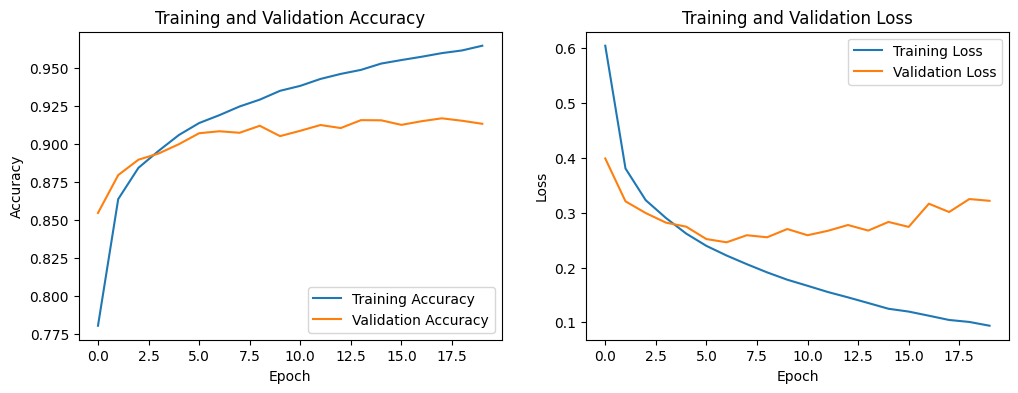

In [6]:

# Visualizing the accuracy and loss dynamics on the validation and training sets
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


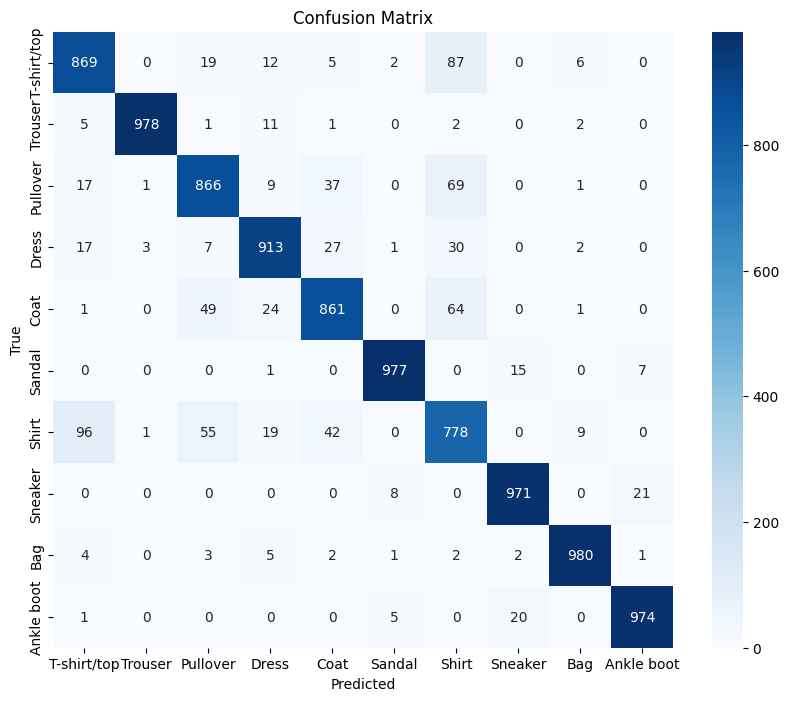

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.88      0.86      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.78      0.77      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [9]:
# Prediction
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(test_labels, predicted_labels, target_names=class_names))

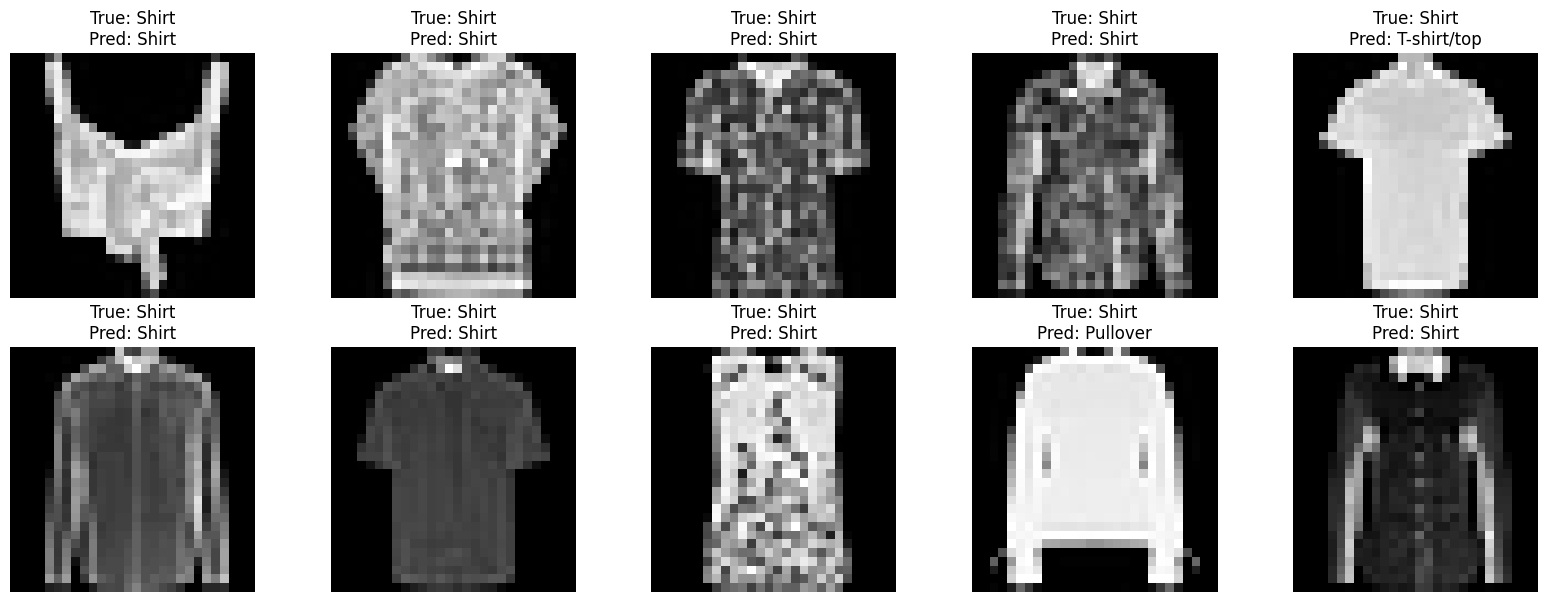

In [10]:
# Displaying 10 random shirt images with their true and predicted labels
shirt_indices = np.where(test_labels == 6)[0]
sample_shirt_indices = np.random.choice(shirt_indices, 10, replace=False)

plt.figure(figsize=(20, 7))
for i, index in enumerate(sample_shirt_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_labels[index]]}")
    plt.axis('off')

plt.show()

In [ ]:
# Through experiments with network parameters, we managed to achieve accuracy values above 91%, specifically 91.67%.
# As it might seem from the graphs, visually it looks like the training results show a growing discrepancy 
# between the validation and training sets. This usually indicates overfitting of the model. 
# However, it should be noted that due to the successful random initialization of the weights, 
# we achieved fairly high accuracy and low losses on both the training and validation sets already at the first epoch.
# Therefore, further training did not lead to significant accuracy changes on the test set, 
# while accuracy on the training data continued to grow, indicating increasing overfitting. 
# Thanks to early stopping, we obtained a model that showed the best results on the test set.
# As we can see from the Classification Report, the model had problems predicting shirts.
# The confusion matrix shows that the model often confuses shirts with T-shirts, pullovers, dresses, and coats.
# As the sample output showed, due to the low image quality, shirts are indeed difficult to distinguish, 
# even for the human eye.